In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
import os

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = r'C:\Users\user\Downloads\gg-project-main\gg-project-main\audio_feature_scale.json'  # json 파일의 이름이 실제 파일 이름과 일치해야 합니다

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 분위기 레이블: 예시로 3개의 레이블을 부여 (각 노래에 실제 레이블을 할당해야 합니다)
# 예시 레이블, 실제 데이터에 맞게 수정하세요
# anger, disgust, fear, joy, neutral, sadness, surprise
num_samples = len(data)
# 0: anger, 1: disgust, 2: fear, 3: joy, 4: neutral, 5: sadness, 6: surprise 
labels = [0] * 50 + [1] * 50  + [2] * 48  + [3] * 50 + [4] * 50 + [5] * 50 + [6] * 50

Length of data (audio features): 342
Lengths match. Proceeding with DataFrame creation.


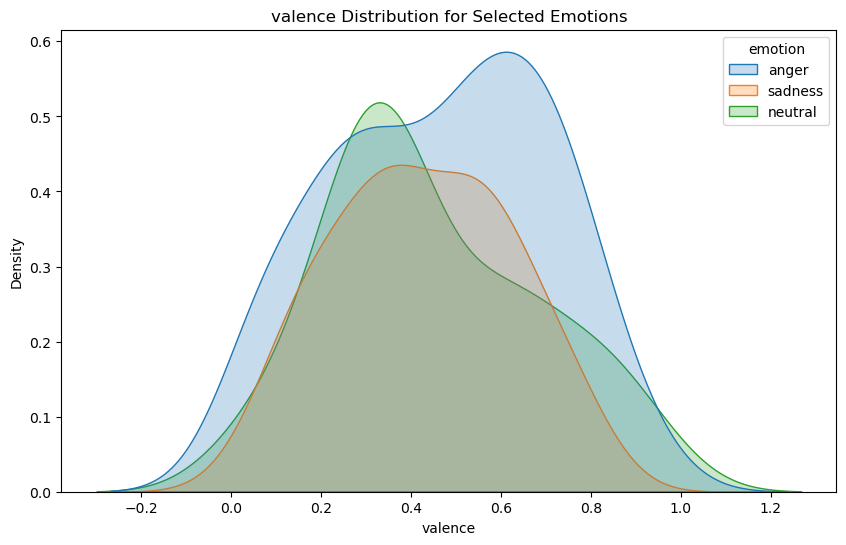

In [7]:
import torch
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = r'C:\Users\user\Downloads\gg-project-main\gg-project-main\audio_feature_scale.json'

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 데이터 길이 확인
print(f"Length of data (audio features): {len(data)}")

# 2. 레이블 동적으로 생성: 각 감정에 대해 고르게 분포한다고 가정
num_emotions = 7  # 감정 레이블 수
labels = np.random.choice(num_emotions, size=len(data))  # 데이터 길이에 맞춰 레이블 생성

# 2. 길이 맞추기: 필요시 레이블 배열 잘라내기
if len(data) == len(labels):
    print("Lengths match. Proceeding with DataFrame creation.")
else:
    print("Warning: Lengths do not match. Adjusting the size of labels.")
    labels = labels[:len(data)]  # 데이터 길이에 맞게 레이블을 자르기

# emotion 레이블 추가
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]

# 오디오 피처와 감정 레이블을 DataFrame으로 변환
audio_features_df = pd.DataFrame(data, columns=['tempo', 'valence', 'energy', 'danceability', 'acousticness', 'speechiness', 'liveness'])
audio_features_df['emotion'] = [emotion_labels[label] for label in labels]  # labels 배열을 이용하여 감정 레이블 추가

# 2. 시각화하고 싶은 감정 선택
emotions_to_visualize = ["neutral", "sadness", "anger"]

# 선택한 감정에 해당하는 데이터만 필터링
filtered_df = audio_features_df[audio_features_df['emotion'].isin(emotions_to_visualize)]

# 3. 시각화: valence에 대한 감정 분포
feature='valence'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x=feature, hue='emotion', fill=True)
plt.title(f'{feature} Distribution for Selected Emotions')
plt.show()


In [10]:
labels

NameError: name 'labels' is not defined

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = r'C:\Users\user\Downloads\gg-project-main\gg-project-main\audio_feature_scale.json'  # json 파일의 경로

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 2. 피처 스케일링 (정규화)
scaler = MinMaxScaler()  # 0과 1 사이로 모든 피처를 정규화
normalized_data = scaler.fit_transform(data)

# 3. 레이블 설정
# 예시로 감정 레이블을 정의함 (실제 데이터에 맞게 수정)
labels = np.array([0] * 50 + [1] * 50  + [2] * 48  + [3] * 50 + [4] * 50 + [5] * 50 + [6] * 44)

# 4. 커스텀 데이터셋 정의
class AudioFeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# 5. 데이터셋 및 DataLoader 생성
dataset = AudioFeatureDataset(normalized_data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 6. 간단한 신경망 모델 정의 (여기서 MLP 사용)
class AudioEmotionClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AudioEmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 7. 모델 초기화 및 학습 설정
input_size = normalized_data.shape[1]  # 피처 개수
hidden_size = 64  # 은닉층의 크기
num_classes = 7  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. 모델 학습
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')

print("Training completed.")

# 9. 모델 저장
model_save_path = r'C:\Users\user\Downloads\gg-project-main\gg-project-main\audio_emotion_classifier_scale.pth'  # 모델을 저장할 경로
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# 10. 저장된 모델 불러오기 (필요할 때)
loaded_model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()  # 모델을 평가 모드로 전환
print("Model loaded and ready for inference.")


Epoch [1/100], Loss: 1.9345
Epoch [2/100], Loss: 1.9230
Epoch [3/100], Loss: 1.9077
Epoch [4/100], Loss: 1.8938
Epoch [5/100], Loss: 1.8771
Epoch [6/100], Loss: 1.8643
Epoch [7/100], Loss: 1.8462
Epoch [8/100], Loss: 1.8286
Epoch [9/100], Loss: 1.8115
Epoch [10/100], Loss: 1.7898
Epoch [11/100], Loss: 1.7706
Epoch [12/100], Loss: 1.7545
Epoch [13/100], Loss: 1.7324
Epoch [14/100], Loss: 1.7140
Epoch [15/100], Loss: 1.6957
Epoch [16/100], Loss: 1.6772
Epoch [17/100], Loss: 1.6588
Epoch [18/100], Loss: 1.6440
Epoch [19/100], Loss: 1.6243
Epoch [20/100], Loss: 1.6089
Epoch [21/100], Loss: 1.5947
Epoch [22/100], Loss: 1.5821
Epoch [23/100], Loss: 1.5667
Epoch [24/100], Loss: 1.5590
Epoch [25/100], Loss: 1.5436
Epoch [26/100], Loss: 1.5316
Epoch [27/100], Loss: 1.5186
Epoch [28/100], Loss: 1.5107
Epoch [29/100], Loss: 1.4979
Epoch [30/100], Loss: 1.4856
Epoch [31/100], Loss: 1.4799
Epoch [32/100], Loss: 1.4714
Epoch [33/100], Loss: 1.4630
Epoch [34/100], Loss: 1.4515
Epoch [35/100], Loss: 1

C:\Users\user\AppData\Local\Temp\ipykernel_20064\1152946931.py:95: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = r'C:\Users\user\Downloads\gg-project-main\gg-project-main\audio_feature_scale.json'  # json 파일의 경로

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 2. 피처 스케일링 (정규화)
scaler = MinMaxScaler()  # 0과 1 사이로 모든 피처를 정규화
normalized_data = scaler.fit_transform(data)

# 3. 레이블 설정
labels = np.array([0] * 50 + [1] * 50  + [2] * 48  + [3] * 50 + [4] * 50 + [5] * 50 + [6] * 44)

# 4. 커스텀 데이터셋 정의
class AudioFeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# 5. 데이터셋 및 DataLoader 생성
dataset = AudioFeatureDataset(normalized_data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 6. 간단한 신경망 모델 정의 (여기서 MLP 사용)
class AudioEmotionClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AudioEmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 7. 모델 초기화 및 학습 설정
input_size = normalized_data.shape[1]  # 피처 개수
hidden_size = 64  # 은닉층의 크기
num_classes = 7  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. 모델 학습
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')

print("Training completed.")

# 9. 모델 저장
model_save_path = r'C:\Users\user\Downloads\gg-project-main\gg-project-main\audio_emotion_classifier_scale.pth'  # 모델을 저장할 경로
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# 10. 저장된 모델 불러오기 (필요할 때)
loaded_model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()  # 모델을 평가 모드로 전환
print("Model loaded and ready for inference.")

Epoch [1/100], Loss: 1.9506
Epoch [2/100], Loss: 1.9285
Epoch [3/100], Loss: 1.9095
Epoch [4/100], Loss: 1.8935
Epoch [5/100], Loss: 1.8749
Epoch [6/100], Loss: 1.8568
Epoch [7/100], Loss: 1.8387
Epoch [8/100], Loss: 1.8155
Epoch [9/100], Loss: 1.7956
Epoch [10/100], Loss: 1.7753
Epoch [11/100], Loss: 1.7525
Epoch [12/100], Loss: 1.7320
Epoch [13/100], Loss: 1.7124
Epoch [14/100], Loss: 1.6898
Epoch [15/100], Loss: 1.6711
Epoch [16/100], Loss: 1.6506
Epoch [17/100], Loss: 1.6352
Epoch [18/100], Loss: 1.6193
Epoch [19/100], Loss: 1.6000
Epoch [20/100], Loss: 1.5861
Epoch [21/100], Loss: 1.5710
Epoch [22/100], Loss: 1.5552
Epoch [23/100], Loss: 1.5418
Epoch [24/100], Loss: 1.5305
Epoch [25/100], Loss: 1.5184
Epoch [26/100], Loss: 1.5067
Epoch [27/100], Loss: 1.4972
Epoch [28/100], Loss: 1.4918
Epoch [29/100], Loss: 1.4764
Epoch [30/100], Loss: 1.4758
Epoch [31/100], Loss: 1.4678
Epoch [32/100], Loss: 1.4540
Epoch [33/100], Loss: 1.4424
Epoch [34/100], Loss: 1.4394
Epoch [35/100], Loss: 1

C:\Users\user\AppData\Local\Temp\ipykernel_4652\641322206.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))


# 생성한 모델 써보기. 아무 플레이리스트나 넣어보시오

In [1]:
import torch
import torch.nn as nn
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import MinMaxScaler

# Spotify API 인증 설정
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="c181c0a8accf4e31a688851b32c609c4",       
    client_secret="9afa81c69ae6489bb9143f79981e0987"
))

# 플레이리스트 ID를 통해 트랙 ID 가져오는 함수
def get_playlist_track_ids(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    
    track_ids = []
    
    for item in tracks:
        track = item['track']
        track_ids.append(track['id'])
    
    return track_ids

# 필요한 오디오 피쳐를 가져오는 함수
def get_selected_audio_features(track_id):
    features = sp.audio_features(track_id)
    if features and features[0]:
        audio_features = features[0]
        selected_features = [
            audio_features['tempo'],
            audio_features['valence'],
            audio_features['energy'],
            audio_features['danceability'],
            audio_features['acousticness'],
            audio_features['speechiness'],
            audio_features['liveness']
        ]
        return selected_features
    return None

# 트랙 ID를 통해 노래 제목 가져오기
def get_track_name(track_id):
    track_info = sp.track(track_id)
    if track_info:
        return track_info['name']
    return None

# 여러 트랙에 대해 오디오 피처를 가져와 new_audio_features에 저장
def process_tracks_for_prediction(track_ids):
    all_features = []
    track_names = []
    
    for track_id in track_ids:
        try:
            track_name = get_track_name(track_id)
            if not track_name:
                print(f"트랙 이름을 가져올 수 없습니다: {track_id}")
                continue
            
            selected_features = get_selected_audio_features(track_id)
            if selected_features:
                print(f"트랙 {track_name}의 오디오 피쳐가 업데이트되었습니다.")
                all_features.append(selected_features)
                track_names.append(track_name)
            else:
                print(f"해당 트랙에 대한 오디오 피쳐를 가져올 수 없습니다: {track_name} ({track_id})")
        except Exception as e:
            print(f"오류 발생: {e} (트랙 ID: {track_id})")
    
    return np.array(all_features), track_names

# 예시 플레이리스트 ID
playlist_id = '4YAELvjcWBHcyTgxHaWdvL'

# 플레이리스트에 담긴 트랙 ID 가져오기
track_ids = get_playlist_track_ids(playlist_id)

# 100개 트랙의 오디오 피처 가져오기
new_audio_features, track_names = process_tracks_for_prediction(track_ids)

# 스케일러 초기화 및 학습
scaler = MinMaxScaler()
scaler.fit(new_audio_features)

# 학습된 스케일러를 사용해 데이터를 정규화
normalized_audio_features = scaler.transform(new_audio_features)

## 모델 초기화(불러올 때 사용)
class AudioEmotionClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AudioEmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
# 모델 불러오기
input_size = normalized_audio_features.shape[1]
hidden_size = 64  # 은닉층 크기
num_classes = 7  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load(r'C:\Users\user\Downloads\gg-project-main\gg-project-main\audio_emotion_classifier_scale.pth'))
model.eval()

# 소프트맥스 함수 초기화
softmax = nn.Softmax(dim=1)

# 각 노래에 대해 감정 예측
for i, features in enumerate(normalized_audio_features):
    new_audio_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # 1차원 배열을 배치로 변환
    prediction = model(new_audio_tensor)
    
    # 소프트맥스 적용하여 확률 계산
    probabilities = softmax(prediction).detach().numpy()  # numpy로 변환
    predicted_label = torch.argmax(prediction).item()
    
    print(f"Track: {track_names[i]}, Predicted Emotion Label: {predicted_label}")
    
    # 각 클래스의 확률 출력
    for j, prob in enumerate(probabilities[0]):
        print(f"Label {j}: {prob:.4f}")  # 확률을 소수점 4자리까지 출력


트랙 Spicy의 오디오 피쳐가 업데이트되었습니다.
트랙 Queencard의 오디오 피쳐가 업데이트되었습니다.
트랙 I AM의 오디오 피쳐가 업데이트되었습니다.
트랙 UNFORGIVEN (feat. Nile Rodgers)의 오디오 피쳐가 업데이트되었습니다.
트랙 Kitsch의 오디오 피쳐가 업데이트되었습니다.
트랙 Super의 오디오 피쳐가 업데이트되었습니다.
트랙 FLOWER의 오디오 피쳐가 업데이트되었습니다.
트랙 With you의 오디오 피쳐가 업데이트되었습니다.
트랙 Hype Boy의 오디오 피쳐가 업데이트되었습니다.
트랙 Ditto의 오디오 피쳐가 업데이트되었습니다.
트랙 Love Always Run Away의 오디오 피쳐가 업데이트되었습니다.
트랙 Fighting (Feat. Lee Young Ji)의 오디오 피쳐가 업데이트되었습니다.
트랙 Cupid의 오디오 피쳐가 업데이트되었습니다.
트랙 Let's Say Goodbye의 오디오 피쳐가 업데이트되었습니다.
트랙 Allergy의 오디오 피쳐가 업데이트되었습니다.
트랙 OMG의 오디오 피쳐가 업데이트되었습니다.
트랙 Teddy Bear의 오디오 피쳐가 업데이트되었습니다.
트랙 Event Horizon의 오디오 피쳐가 업데이트되었습니다.
트랙 Our Blues, Our Life의 오디오 피쳐가 업데이트되었습니다.
트랙 Love..What is it의 오디오 피쳐가 업데이트되었습니다.
트랙 Heaven(2023)의 오디오 피쳐가 업데이트되었습니다.
트랙 If We Ever Meet Again의 오디오 피쳐가 업데이트되었습니다.
트랙 I Don’t Think That I Like Her의 오디오 피쳐가 업데이트되었습니다.
트랙 Dangerously의 오디오 피쳐가 업데이트되었습니다.
트랙 Don't say Goodbye의 오디오 피쳐가 업데이트되었습니다.
트랙 After LIKE의 오디오 피쳐가 업데이트되었습니다.
트랙 Thirsty의 오디오 피쳐가 업데이트되었습니다.
트랙 Heart의 오디오 피쳐가 업

C:\Users\user\AppData\Local\Temp\ipykernel_17076\2082579229.py:111: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'C:\Users\user\Downloads\